In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statistics
from scipy import stats

# Disable warnings!
import warnings
warnings.filterwarnings("ignore")

In [85]:
df=pd.read_csv('/Users/ee/Documents/GITHUB/Project-12 Alaska Airlines/Cheeseplate Demand Data.csv') # contains betwen 2016-March to 2019-February
df.shape

(5000, 6)

In [86]:
df.isnull().sum()

Dptr Hour                 0
Length of Flight (Hrs)    0
Day of Week               0
Passengers Boarded        0
Stock Out Occurred        0
Cheese Platters Sold      0
dtype: int64

In [87]:
df.head()

,Dptr Hour,Length of Flight (Hrs),Day of Week,Passengers Boarded,Stock Out Occurred,Cheese Platters Sold
0,8,1,Tuesday,144,0,18
1,5,3,Monday,152,0,15
2,4,2,Thursday,150,0,16
3,6,2,Thursday,131,0,13
4,5,6,Thursday,164,0,18


In [88]:
#Converting day in number to order easily on the graphs
d={'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}

df['Day of Week']=df['Day of Week'].map(d)
df.shape

(5000, 6)

In [89]:
df.head()

,Dptr Hour,Length of Flight (Hrs),Day of Week,Passengers Boarded,Stock Out Occurred,Cheese Platters Sold
0,8,1,2,144,0,18
1,5,3,1,152,0,15
2,4,2,4,150,0,16
3,6,2,4,131,0,13
4,5,6,4,164,0,18


 # 1. INVESTIGATE THE DATA

## 1A. Relation Between Variables and Number of Cheese Platters Sold

In [90]:
# #Scatter Plot Function
# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : 22}

# ff= plt.rcParams.update('font', **font)

# Set the font dictionaries (for plot title and axis titles)
title_font = {'fontname':'Arial', 'size':'15', 'color':'black', 'weight':'bold',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'13'}

def relation_s(a):
    t=df.groupby(by=df.columns[a]).mean()
    t=t[['Cheese Platters Sold']]

    plt.figure(figsize=(15,7))
    
    if df.columns[a]!='Dptr Hour':
        plt.scatter(x=t.index, y=t['Cheese Platters Sold'])
        plt.title('Average Cheese Platters Sold by '+df.columns[a],**title_font)
        plt.xlabel(df.columns[a],**axis_font, labelpad=10)
        plt.ylabel('Cheese Platters Sold',**axis_font)
        plt.show()
    else: # this section works only for "Dptr Hour"
        x=t.index
        y=t['Cheese Platters Sold']
        plt.scatter(x,y)
        plt.title('Average Cheese Platters Sold by '+df.columns[0],**title_font)
        plt.xlabel(df.columns[0],**axis_font, labelpad=10)
        plt.ylabel('Cheese Platters Sold',**axis_font)

        x1=t.index[:8]
        y1=t['Cheese Platters Sold'][:8]
        z = np.polyfit(x1, y1, 1)
        p = np.poly1d(z)
        plt.plot(x1,p(x1),"r--")

        x2=t.index[8:20]
        y2=t['Cheese Platters Sold'][8:20]
        z = np.polyfit(x2, y2, 1)
        p = np.poly1d(z)
        plt.plot(x2,p(x2),"r--")

        x3=t.index[20:]
        y3=t['Cheese Platters Sold'][20:]
        z = np.polyfit(x3, y3, 1)
        p = np.poly1d(z)
        plt.plot(x3,p(x3),"r--")

        plt.show()

In [91]:
# Bar chart graph function
def relation_b(a):
    t=df.groupby(by=df.columns[a]).mean()
    t=t[['Cheese Platters Sold']]
#     title='Average Cheese Platters Sold by '+df.columns[a]
#     t.plot(kind='bar', figsize=(15,7),title=title).grid(axis='y')
    t.plot(kind='bar', figsize=(15,7)).grid(axis='y')
    plt.title('Average Cheese Platters Sold by '+df.columns[a],**title_font)
    plt.xlabel(df.columns[a],**axis_font, labelpad=10)
    plt.ylabel('Cheese Platters Sold',**axis_font)
    plt.show()

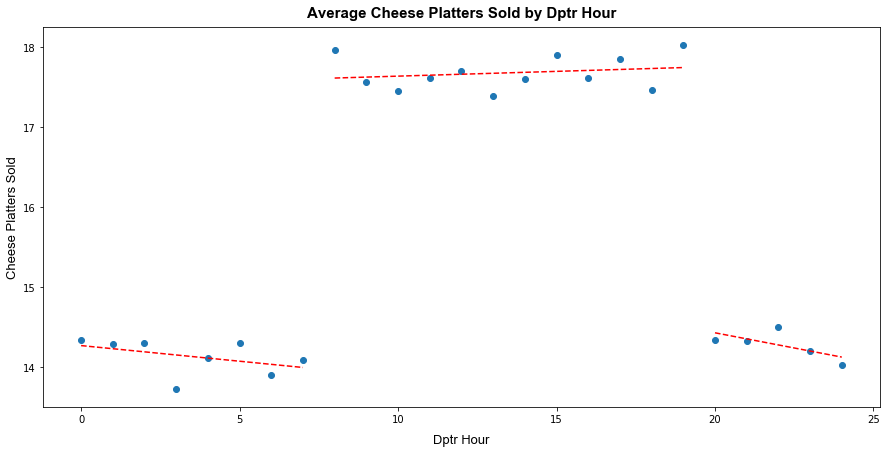

None


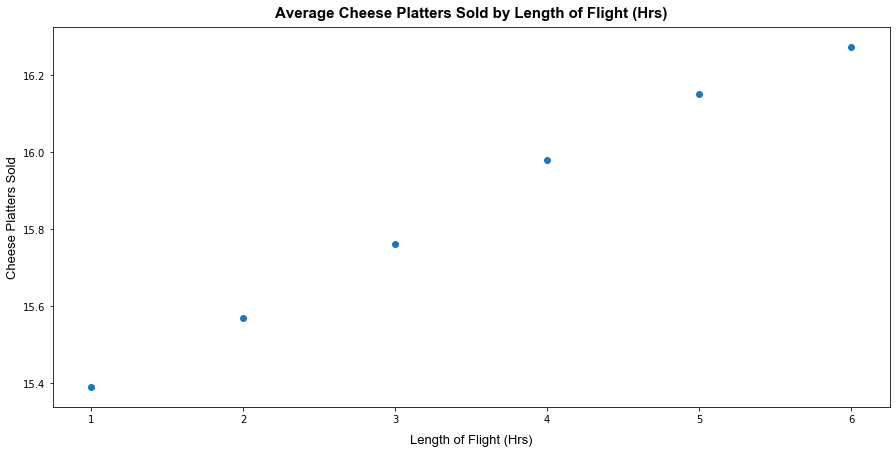

None


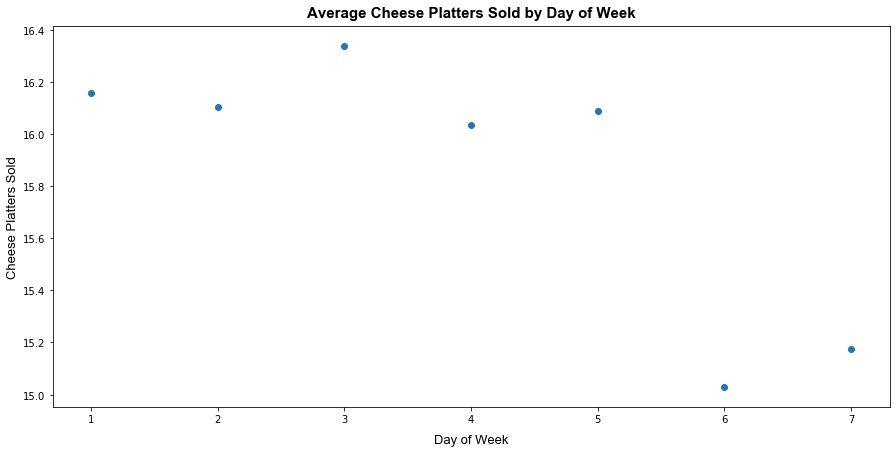

None


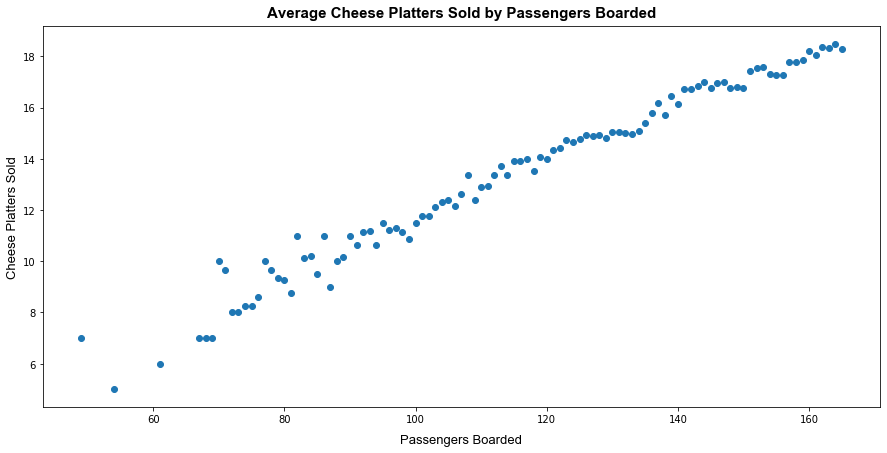

None


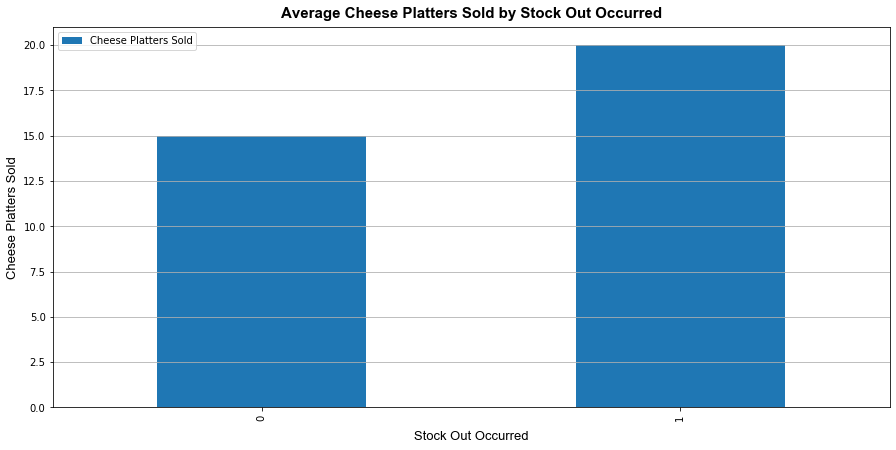

None


In [92]:
for i in range(5):
    if i==4:
        print(relation_b(i))
    else:
        print(relation_s(i))

## by Dept Hour & Week Days

In [93]:
df2=df

In [94]:
d={1:'Weekday',2:'Weekday',3:'Weekday',4:'Weekday',5:'Weekday',6:'Weekend',7:'Weekend'}

df2['Week Part']=df2['Day of Week'].map(d)
df2.shape

(5000, 7)

In [95]:
df2.head()

,Dptr Hour,Length of Flight (Hrs),Day of Week,Passengers Boarded,Stock Out Occurred,Cheese Platters Sold,Week Part
0,8,1,2,144,0,18,Weekday
1,5,3,1,152,0,15,Weekday
2,4,2,4,150,0,16,Weekday
3,6,2,4,131,0,13,Weekday
4,5,6,4,164,0,18,Weekday


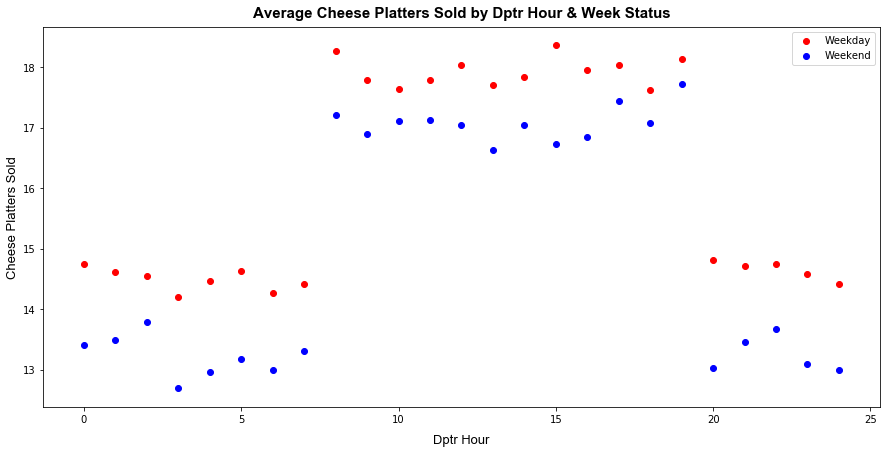

In [96]:
p=df2.groupby(['Week Part','Dptr Hour']).mean()[['Cheese Platters Sold']].unstack().T
p.index=p.index.droplevel(level=0)

x=p.index
y1=p['Weekday']
y2=p['Weekend']


plt.figure(figsize=(15,7))
plt.scatter(x,y1,color='red', label='Weekday')
plt.scatter(x,y2,color='blue', label='Weekend')
plt.title('Average Cheese Platters Sold by Dptr Hour & Week Status',**title_font)
plt.xlabel('Dptr Hour',**axis_font, labelpad=10)
plt.ylabel('Cheese Platters Sold',**axis_font)
plt.legend()
plt.show()

### describe Non Stock Out - Cheese Platters Sold

In [97]:
# nso=df2[df2['Stock Out Occurred']==0][['Cheese Platters Sold']]
nso=df2[['Cheese Platters Sold']]
nso=nso.describe(percentiles=[.05, .5, .95])
nso.round(decimals=1)

,Cheese Platters Sold
count,5000.0
mean,15.8
std,3.0
min,5.0
5%,11.0
50%,16.0
95%,20.0
max,20.0


In [56]:
# sns.distplot(df2[['Cheese Platters Sold']], kde=False)


## 1B. Distribution of Variables

In [98]:
def graphs(table,main_title):

    plt.subplots(3,2, figsize=(20,15))
    plt.suptitle(main_title, size=20) # add above a Main Title

    plt.subplot(3,2,1, title='distribution of Dptr Hour')
    sns.distplot(table['Dptr Hour'], bins=25, kde=False, color='c') # alternative colors are k, g, b, and m

    plt.subplot(3,2,2, title='distribution of Length of Flight (Hrs)')
    sns.distplot(table['Length of Flight (Hrs)'], bins=25, kde=False)

    plt.subplot(3,2,3, title='distribution of Day of Week')
    sns.distplot(table['Day of Week'], kde=False)

    plt.subplot(3,2,4, title='distribution of Passengers Boarded')
    sns.distplot(table['Passengers Boarded'], bins=50, kde=False)
    
    plt.subplot(3,2,5, title='distribution of Stock Out Occurred')
    sns.distplot(table['Stock Out Occurred'],kde=False)
    
    plt.subplot(3,2,6, title='distribution of Cheese Platters Sold')
    sns.distplot(table['Cheese Platters Sold'], bins=25, kde=False)

In [99]:
np.arange(0,166,5)

array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
        65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
       130, 135, 140, 145, 150, 155, 160, 165])

In [100]:
def dist_graph(a,b,c):
    if b=='y':
        t=df.groupby(by=df.columns[a]).count()[:c]
    else:
        t=df.groupby(by=df.columns[a]).count()
    
    t=t[[t.columns[0]]]
    title='Number of Flights by '+df.columns[a]
#     plt.title(title,**title_font)
    if df.columns[a]=='Passengers Boarded':
#         plt.hist(t, bins=23, range(49,165,5))
        graph=t.plot(kind='bar', figsize=(13,6)).grid(axis='y') #,title=title
        plt.title(title,**title_font)
#         plt.xticks([])
#         l=list(range(0,166,5))
        plt.xticks(np.arange(33), list(range(0,166,5)))  # Set label locations
        plt.xticks(np.arange(33), list(range(0,166,5)))  # Set text labels.
#         graph.set_xticks(list(range(0,166,5))
#         graph.set_xticklabels(list(range(0,166,5))
#         plt.xticks(np.arange(0, 165,5))
        plt.legend('')
    else:
        t.plot(kind='bar', figsize=(13,6)).grid(axis='y') #,title=title
        plt.title(title,**title_font)
    plt.ylabel('Number of Flights',**axis_font)
    plt.xlabel(df.columns[a],**axis_font, labelpad=10)
    plt.legend('')
#     plt.show()

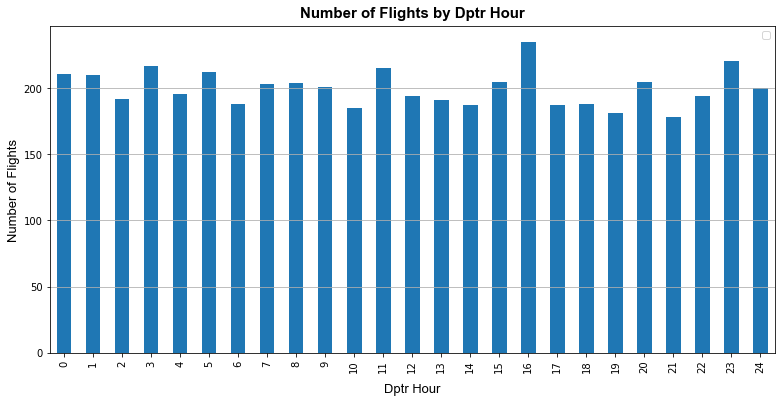

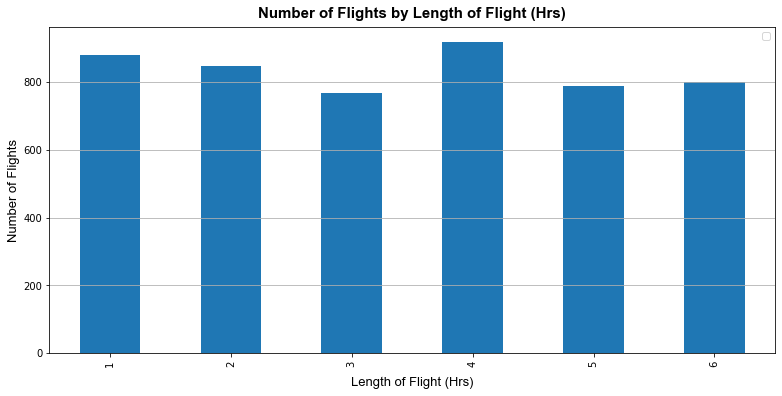

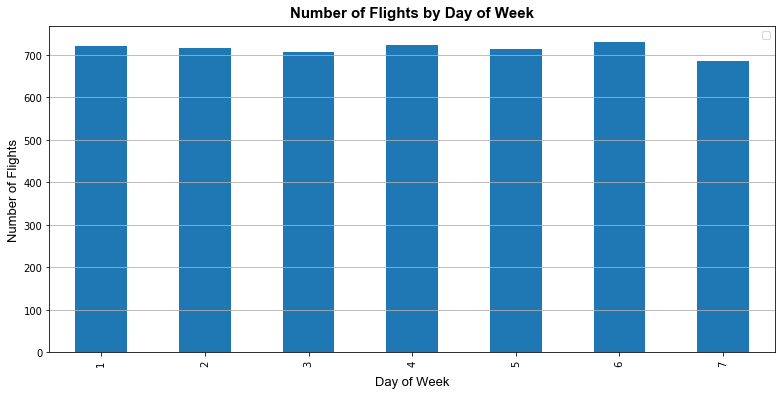

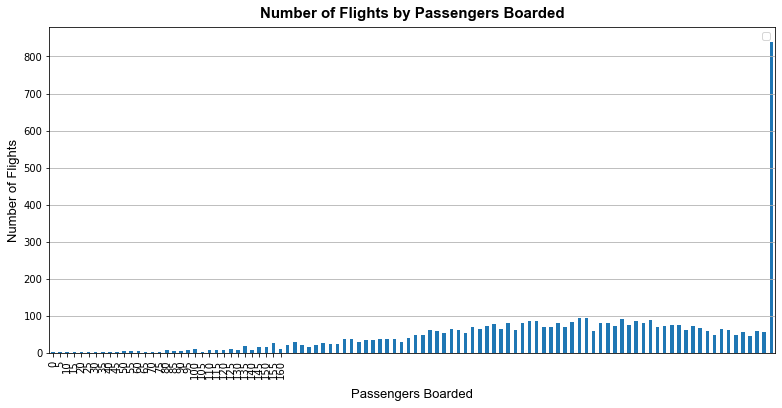

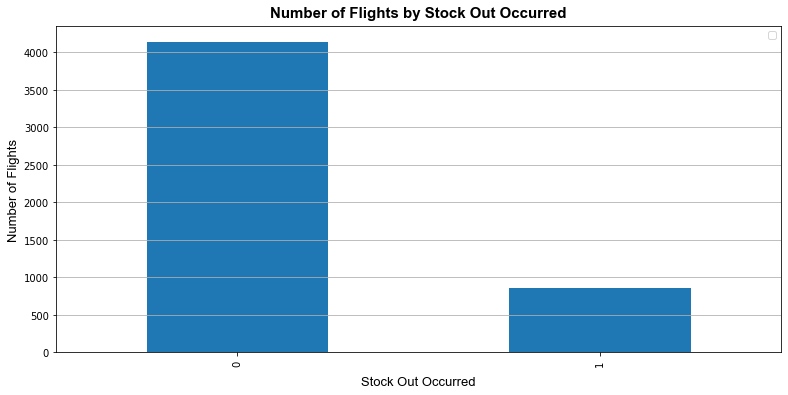

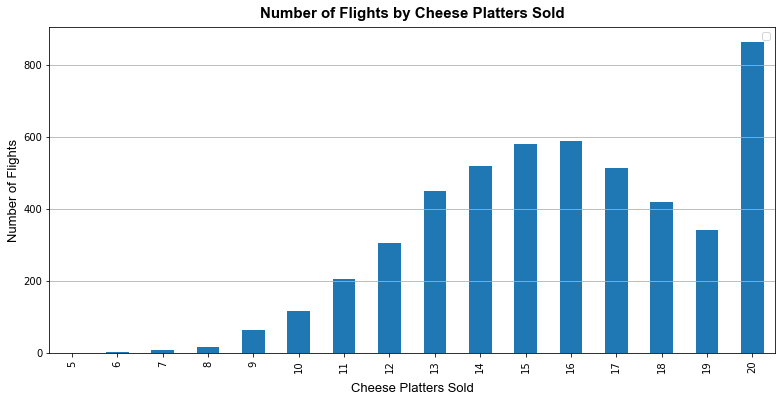

In [101]:
for i in range(6):
    dist_graph(i,'n',-1)

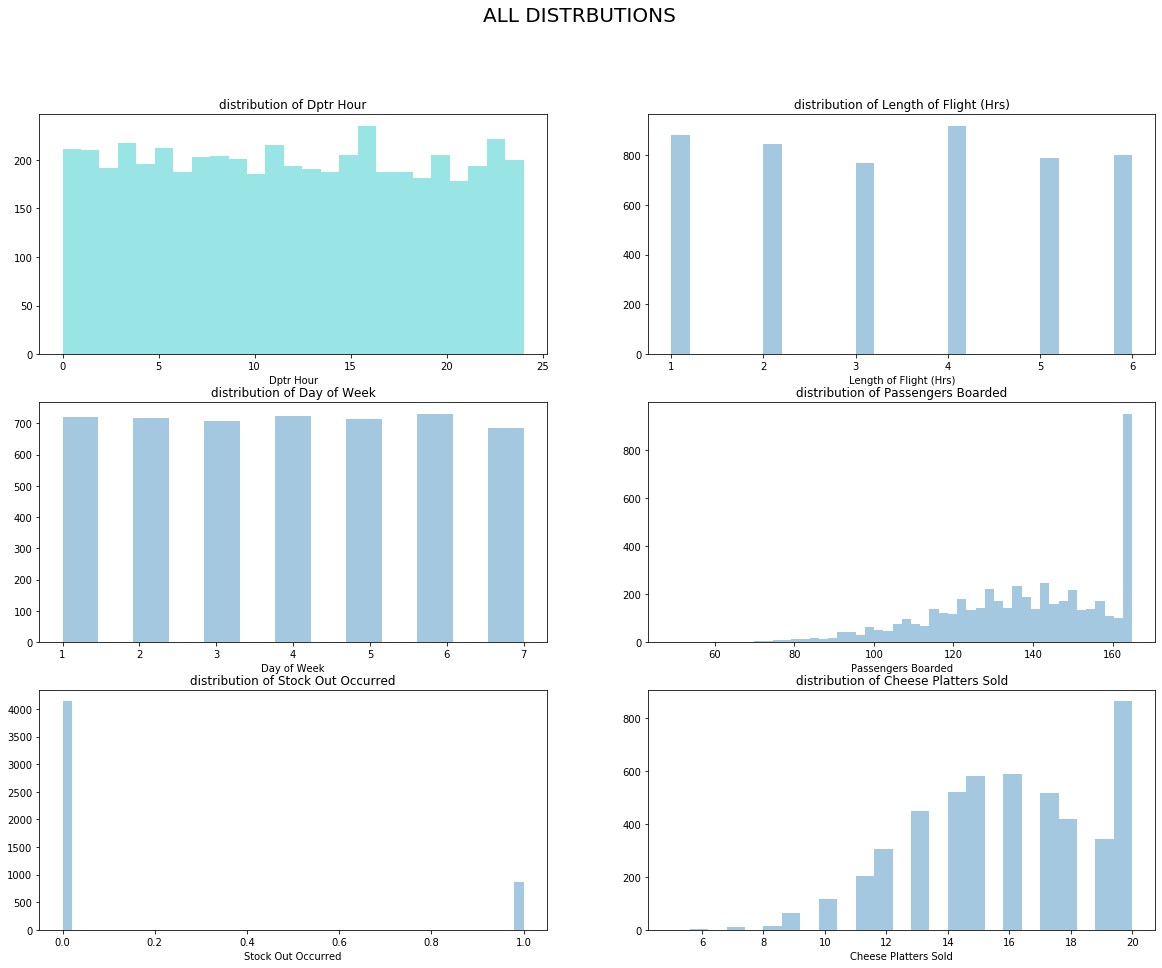

In [61]:
graphs(df,'ALL DISTRBUTIONS')

# 3.ESTIMATING DEMAND

## Model Poisson Regression 

In [62]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split,cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew
from sklearn.metrics import r2_score
# from sklearn.linear_model import LogisticRegression,LinearRegression
# from sklearn.metrics import accuracy_score, confusion_matrix

In [103]:
# the functin which classify departure hour by three class
time_class_dict={ 'early':[0, 7], 'midday':[8, 19],'night':[20,24]}

def time_class_maker(value, time_class_dict=time_class_dict):
        for k, v in time_class_dict.items():
            if (value>=v[0] and value<=v[1]):
                return(k)
            elif value=='NaN':
                return('unknown')# if time is null so it will return to string as 'unknown'

In [102]:
df3=df2
df3.head()

,Dptr Hour,Length of Flight (Hrs),Day of Week,Passengers Boarded,Stock Out Occurred,Cheese Platters Sold,Week Part
0,8,1,2,144,0,18,Weekday
1,5,3,1,152,0,15,Weekday
2,4,2,4,150,0,16,Weekday
3,6,2,4,131,0,13,Weekday
4,5,6,4,164,0,18,Weekday


In [104]:
df3['Hour Class']=df3['Dptr Hour'].map(lambda x: time_class_maker(x))

# convert numeric features to string format
df3['Dptr Hour']=df3['Dptr Hour'].astype(str) # convert to categorical feature
df3['Day of Week']=df3['Day of Week'].astype(str) # convert to categorical feature

In [106]:
df3.head()

,Dptr Hour,Length of Flight (Hrs),Day of Week,Passengers Boarded,Stock Out Occurred,Cheese Platters Sold,Week Part,Hour Class
0,8,1,2,144,0,18,Weekday,midday
1,5,3,1,152,0,15,Weekday,early
2,4,2,4,150,0,16,Weekday,early
3,6,2,4,131,0,13,Weekday,early
4,5,6,4,164,0,18,Weekday,early


In [108]:
df3.dtypes

Dptr Hour                 object
Length of Flight (Hrs)     int64
Day of Week               object
Passengers Boarded         int64
Stock Out Occurred         int64
Cheese Platters Sold       int64
Week Part                 object
Hour Class                object
dtype: object

In [109]:
df3=df3[['Week Part','Hour Class','Length of Flight (Hrs)',
       'Passengers Boarded', 'Cheese Platters Sold']] 
df3=pd.get_dummies(df3)
df3.head()

,Length of Flight (Hrs),Passengers Boarded,Cheese Platters Sold,Week Part_Weekday,Week Part_Weekend,Hour Class_early,Hour Class_midday,Hour Class_night
0,1,144,18,1,0,0,1,0
1,3,152,15,1,0,1,0,0
2,2,150,16,1,0,1,0,0
3,2,131,13,1,0,1,0,0
4,6,164,18,1,0,1,0,0


In [110]:
features=['Length of Flight (Hrs)','Passengers Boarded','Week Part_Weekday',
          'Hour Class_night','Hour Class_midday']#,'Week Part_Weekend','Hour Class_early'--the base features for categories
X=df3[features]
y=df3['Cheese Platters Sold']

X=sm.add_constant(X)

X_train,X_test, y_train, y_test=train_test_split(X,y, test_size=0.25, random_state=42)

In [78]:
# exog, endog = sm.add_constant(x), y
# mod = sm.GLM(endog, exog,
#              family=sm.families.Poisson(link=sm.families.links.log))
# res = mod.fit()

In [111]:
#Using the statsmodels GLM class, train the Poisson regression model on the training data set.

poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit() #Poisson

#Print the training summary.
print(poisson_training_results.summary())

                  Generalized Linear Model Regression Results                   
Dep. Variable:     Cheese Platters Sold   No. Observations:                 3750
Model:                              GLM   Df Residuals:                     3744
Model Family:                   Poisson   Df Model:                            5
Link Function:                      log   Scale:                          1.0000
Method:                            IRLS   Log-Likelihood:                -8698.6
Date:                  Sun, 22 Mar 2020   Deviance:                       182.64
Time:                          16:19:19   Pearson chi2:                     182.
No. Iterations:                       4                                         
Covariance Type:              nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const   

In [112]:
poisson_train_predictions = poisson_training_results.get_prediction(X_train)
predictions_summary_frame = poisson_train_predictions.summary_frame()
y_train_pred_poisson=predictions_summary_frame['mean']

#Make some predictions on the test data set.
poisson_test_predictions = poisson_training_results.get_prediction(X_test)
predictions_summary_frame2 = poisson_test_predictions.summary_frame()
y_test_pred_poisson=predictions_summary_frame2['mean']
# print(predictions_summary_frame)

In [115]:
# drop the "Hour Class_night" feature from the features table
features=['Length of Flight (Hrs)','Passengers Boarded',
          'Week Part_Weekday','Hour Class_midday']#,'Week Part_Weekend','Hour Class_early','Hour Class_night'
X=df3[features]
y=df3['Cheese Platters Sold']

X=sm.add_constant(X)

X_train,X_test, y_train, y_test=train_test_split(X,y, test_size=0.25, random_state=42)

#Using the statsmodels GLM class, train the Poisson regression model on the training data set.
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit() #Poisson

#Print the training summary.
print(poisson_training_results.summary())

                  Generalized Linear Model Regression Results                   
Dep. Variable:     Cheese Platters Sold   No. Observations:                 3750
Model:                              GLM   Df Residuals:                     3745
Model Family:                   Poisson   Df Model:                            4
Link Function:                      log   Scale:                          1.0000
Method:                            IRLS   Log-Likelihood:                -8698.6
Date:                  Sun, 22 Mar 2020   Deviance:                       182.73
Time:                          16:20:37   Pearson chi2:                     182.
No. Iterations:                       4                                         
Covariance Type:              nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const   

min predict value: 9.0
max predict value: 22.0


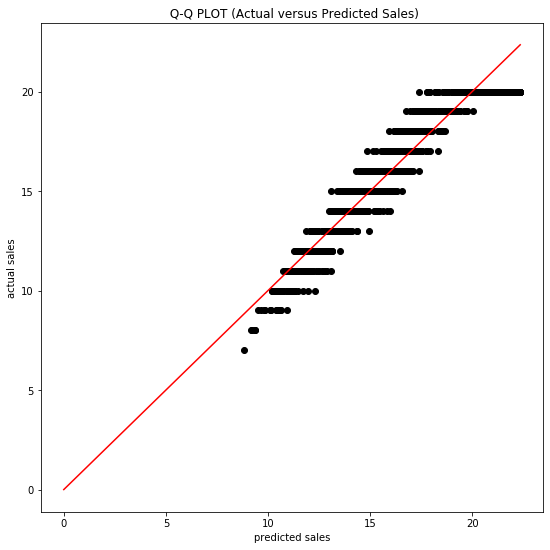

In [116]:
plt.figure(figsize=(9,9))

plt.scatter(y_test_pred_poisson,y_test, c='k')
plt.xlabel('predicted sales')
plt.ylabel('actual sales')
plt.title(' Q-Q PLOT (Actual versus Predicted Sales)')

plt.plot( [0, np.max(y_test_pred_poisson)], [0, np.max(y_test_pred_poisson)], c = 'r')

print('min predict value:', np.round(y_test_pred_poisson.min()))
print('max predict value:', np.round( y_test_pred_poisson.max()))

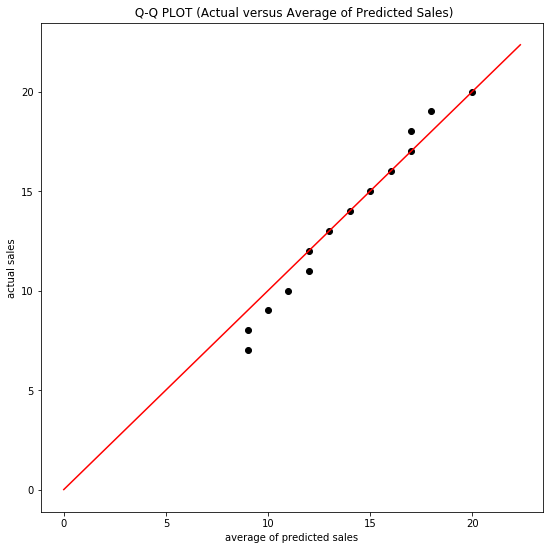

In [117]:
# Take average of the predict values by grouping actual sold values
x=pd.DataFrame(data=[y_test.values,y_test_pred_poisson.values]).T
x=x.rename(columns={0:'actual', 1:'predictions'})
x2=x.groupby(['actual']).mean().round()

plt.figure(figsize=(9,9))

plt.scatter(x2['predictions'],x2.index, c='k')
plt.xlabel('average of predicted sales')
plt.ylabel('actual sales')
plt.title(' Q-Q PLOT (Actual versus Average of Predicted Sales)')

plt.plot( [0, np.max(y_test_pred_poisson)], [0, np.max(y_test_pred_poisson)], c = 'r')

In [454]:
# plt.figure(figsize=(9,9))

# plt.bar(x2['predictions'],x2.index, c='k')
# plt.xlabel('average of predicted sales')
# plt.ylabel('actual sales')
# plt.title(' Q-Q PLOT (Actual versus Average of Predicted Sales)')

# plt.plot( [0, np.max(y_test_pred_poisson)], [0, np.max(y_test_pred_poisson)], c = 'r')

In [443]:
# list(range(5,31))

In [444]:
# x2

### Model 2C- Tweedie Regression 

In [647]:
df7=df2
df7['Unsold Cheese Platters']=20-df7['Cheese Platters Sold']
df7.head()

,Dptr Hour,Length of Flight (Hrs),Day of Week,Passengers Boarded,Stock Out Occurred,Cheese Platters Sold,Week Part,Hour Class,Unsold Cheese Platters
0,8,1,2,144,0,18,Weekday,midday,2
1,5,3,1,152,0,15,Weekday,early,5
2,4,2,4,150,0,16,Weekday,early,4
3,6,2,4,131,0,13,Weekday,early,7
4,5,6,4,164,0,18,Weekday,early,2


In [648]:
df7=df7[['Week Part','Hour Class','Length of Flight (Hrs)',
       'Passengers Boarded', 'Unsold Cheese Platters']] 
df7=pd.get_dummies(df7)
df7.head()

,Length of Flight (Hrs),Passengers Boarded,Unsold Cheese Platters,Week Part_Weekday,Week Part_Weekend,Hour Class_early,Hour Class_midday,Hour Class_night
0,1,144,2,1,0,0,1,0
1,3,152,5,1,0,1,0,0
2,2,150,4,1,0,1,0,0
3,2,131,7,1,0,1,0,0
4,6,164,2,1,0,1,0,0


In [649]:
features=['Length of Flight (Hrs)','Passengers Boarded','Week Part_Weekday','Hour Class_night','Hour Class_midday']#,'Week Part_Weekend','Hour Class_early'
X=df7[features]
y=df7['Unsold Cheese Platters']

X=sm.add_constant(X)

X_train,X_test, y_train, y_test=train_test_split(X,y, test_size=0.80, random_state=42)

In [650]:
#Using the statsmodels GLM class, train the Poisson regression model on the training data set.
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Tweedie()).fit() #Poisson

#Print the training summary.
print(poisson_training_results.summary())

                   Generalized Linear Model Regression Results                    
Dep. Variable:     Unsold Cheese Platters   No. Observations:                 1000
Model:                                GLM   Df Residuals:                      994
Model Family:                     Tweedie   Df Model:                            5
Link Function:                        log   Scale:                         0.56167
Method:                              IRLS   Log-Likelihood:                    nan
Date:                    Sun, 22 Mar 2020   Deviance:                       783.82
Time:                            01:54:25   Pearson chi2:                     558.
No. Iterations:                         7                                         
Covariance Type:                nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------

In [651]:
features=['Length of Flight (Hrs)','Passengers Boarded','Week Part_Weekday','Hour Class_midday']#,'Week Part_Weekend','Hour Class_early','Hour Class_night'
X=df7[features]
y=df7['Unsold Cheese Platters']

X=sm.add_constant(X)

X_train,X_test, y_train, y_test=train_test_split(X,y, test_size=0.80, random_state=42)

#Using the statsmodels GLM class, train the Poisson regression model on the training data set.
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Tweedie()).fit() #Poisson

#Print the training summary.
print(poisson_training_results.summary())

                   Generalized Linear Model Regression Results                    
Dep. Variable:     Unsold Cheese Platters   No. Observations:                 1000
Model:                                GLM   Df Residuals:                      995
Model Family:                     Tweedie   Df Model:                            4
Link Function:                        log   Scale:                         0.56117
Method:                              IRLS   Log-Likelihood:                    nan
Date:                    Sun, 22 Mar 2020   Deviance:                       783.86
Time:                            01:54:34   Pearson chi2:                     558.
No. Iterations:                         7                                         
Covariance Type:                nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------

In [652]:
#Make some predictions on the test data set.
poisson_test_predictions = poisson_training_results.get_prediction(X_test)
predictions_summary_frame2 = poisson_test_predictions.summary_frame()
y_test_pred_poisson=predictions_summary_frame2['mean']
# print(predictions_summary_frame)

min predict value: 1.0
max predict value: 30.0


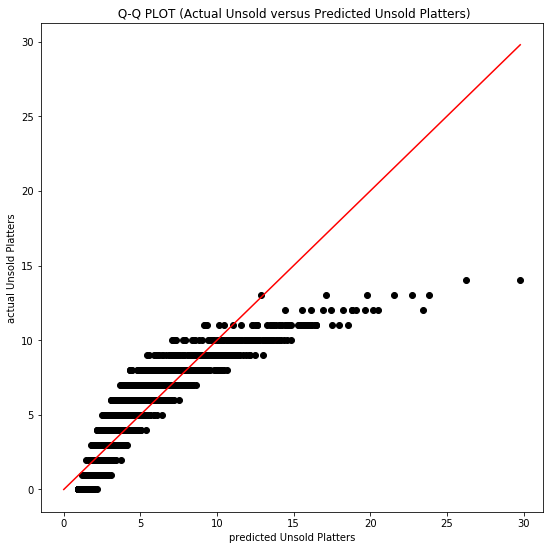

In [654]:
plt.figure(figsize=(9,9))

plt.scatter(y_test_pred_poisson,y_test, c='k')
plt.xlabel('predicted Unsold Platters')
plt.ylabel('actual Unsold Platters')
plt.title(' Q-Q PLOT (Actual Unsold versus Predicted Unsold Platters)')

plt.plot( [0, np.max(y_test_pred_poisson)], [0, np.max(y_test_pred_poisson)], c = 'r')

print('min predict value:', np.round(y_test_pred_poisson.min()))
print('max predict value:', np.round( y_test_pred_poisson.max()))

In [655]:
y_test_pred_poisson=20-y_test_pred_poisson
y_test=20-y_test

min predict value: -10.0
max predict value: 19.0


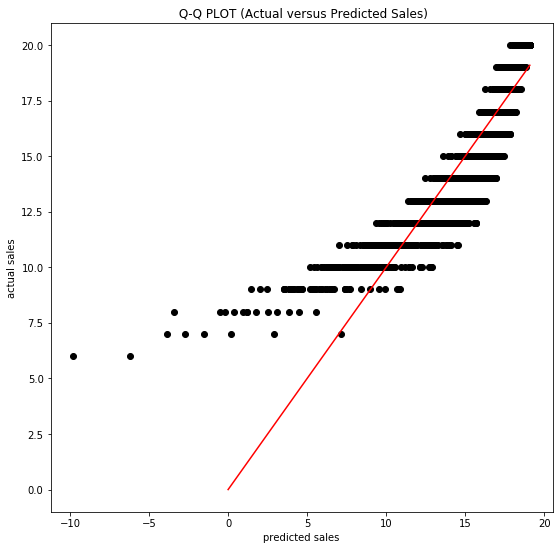

In [656]:
plt.figure(figsize=(9,9))

plt.scatter(y_test_pred_poisson,y_test, c='k')
plt.xlabel('predicted sales')
plt.ylabel('actual sales')
plt.title(' Q-Q PLOT (Actual versus Predicted Sales)')

plt.plot( [0, np.max(y_test_pred_poisson)], [0, np.max(y_test_pred_poisson)], c = 'r')

print('min predict value:', np.round(y_test_pred_poisson.min()))
print('max predict value:', np.round( y_test_pred_poisson.max()))

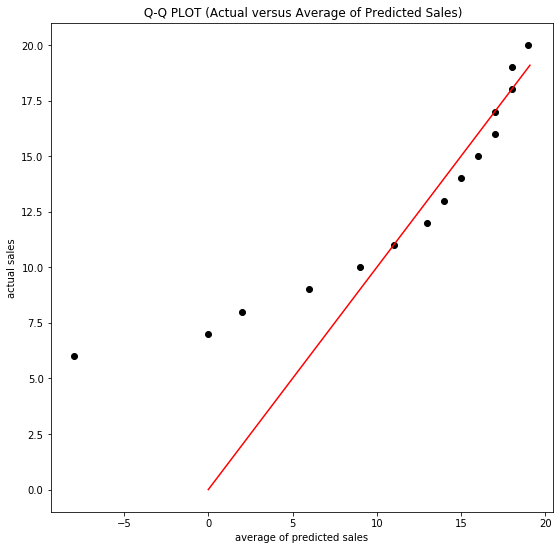

In [657]:
x=pd.DataFrame(data=[y_test.values,y_test_pred_poisson.values]).T
x=x.rename(columns={0:'actual', 1:'predictions'})
x2=x.groupby(['actual']).mean().round()

plt.figure(figsize=(9,9))

plt.scatter(x2['predictions'],x2.index, c='k')
plt.xlabel('average of predicted sales')
plt.ylabel('actual sales')
plt.title(' Q-Q PLOT (Actual versus Average of Predicted Sales)')

plt.plot( [0, np.max(y_test_pred_poisson)], [0, np.max(y_test_pred_poisson)], c = 'r')

### Model 2D- ZeroInflatedPoisson Regression

In [658]:
from statsmodels.discrete.count_model import ZeroInflatedPoisson

In [659]:
df8=df2
df8['Unsold Cheese Platters']=20-df8['Cheese Platters Sold']
df8.head()

,Dptr Hour,Length of Flight (Hrs),Day of Week,Passengers Boarded,Stock Out Occurred,Cheese Platters Sold,Week Part,Hour Class,Unsold Cheese Platters
0,8,1,2,144,0,18,Weekday,midday,2
1,5,3,1,152,0,15,Weekday,early,5
2,4,2,4,150,0,16,Weekday,early,4
3,6,2,4,131,0,13,Weekday,early,7
4,5,6,4,164,0,18,Weekday,early,2


In [660]:
df8=df8[['Week Part','Hour Class','Length of Flight (Hrs)',
       'Passengers Boarded', 'Unsold Cheese Platters']] #
df8=pd.get_dummies(df8)
df8.head()

,Length of Flight (Hrs),Passengers Boarded,Unsold Cheese Platters,Week Part_Weekday,Week Part_Weekend,Hour Class_early,Hour Class_midday,Hour Class_night
0,1,144,2,1,0,0,1,0
1,3,152,5,1,0,1,0,0
2,2,150,4,1,0,1,0,0
3,2,131,7,1,0,1,0,0
4,6,164,2,1,0,1,0,0


In [661]:
features=['Length of Flight (Hrs)','Passengers Boarded','Week Part_Weekday','Hour Class_night','Hour Class_midday']#,'Week Part_Weekend','Hour Class_early'
X=df8[features]
y=df8['Unsold Cheese Platters']

X_train,X_test, y_train, y_test=train_test_split(X,y, test_size=0.20, random_state=42)

clf = ZeroInflatedPoisson(endog = y_train,exog = X_train).fit()
clf_predict=clf.predict(X_test, exog_infl=len(X_test))

Optimization terminated successfully.
         Current function value: 2.810909
         Iterations: 14
         Function evaluations: 21
         Gradient evaluations: 21


In [662]:
clf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      ZeroInflatedPoisson Regression Results                      
==================================================================================
Dep. Variable:     Unsold Cheese Platters   No. Observations:                 4000
Model:                ZeroInflatedPoisson   Df Residuals:                     3995
Method:                               MLE   Df Model:                            4
Date:                    Sun, 22 Mar 2020   Pseudo R-squ.:                 -0.1698
Time:                            01:56:42   Log-Likelihood:                -11244.
converged:                           True   LL-Null:                       -9611.7
Covariance Type:                nonrobust   LLR p-value:                     1.000
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
inflate_const             -1.6072      0.043    -36.993      0.000      -1.692      -1.522
Length of Flight (Hrs)     0.0682      0.005     14.681      0.000       0.059       0.077
Passengers Boarded         0.0087      0.000     53.089      0.000       0.008       0.009
Week Part_Weekday          0.1323      0.018      7.358      0.000       0.097       0.167
Hour Class_night           0.1687      0.019      8.730      0.000       0.131       0.207
Hour Class_midday         -0.1432      0.020     -7.319      0.000      -0.182      -0.105
==========================================================================================
"""

min predict value: 2.0
max predict value: 9.0


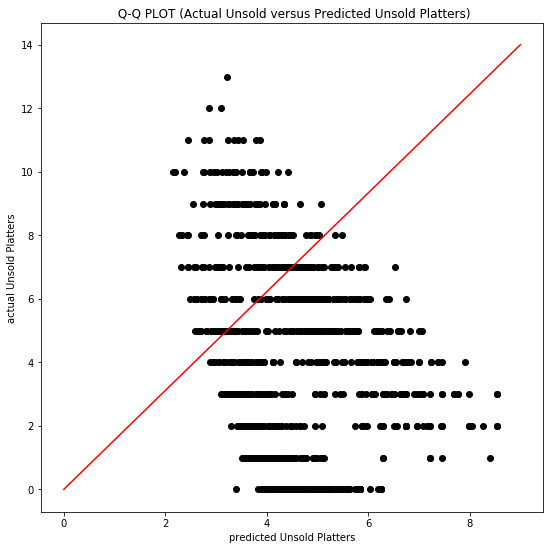

In [663]:
plt.figure(figsize=(9,9))

plt.scatter(clf_predict,y_test, c='k')
plt.xlabel('predicted Unsold Platters')
plt.ylabel('actual Unsold Platters')
plt.title(' Q-Q PLOT (Actual Unsold versus Predicted Unsold Platters)')

plt.plot( [0, 9], [0, 14], c = 'r')

print('min predict value:', np.round(clf_predict.min()))
print('max predict value:', np.round(clf_predict.max()))

In [664]:
clf_predict=20-clf_predict
y_test=20-y_test

min predict value: 11.0
max predict value: 18.0


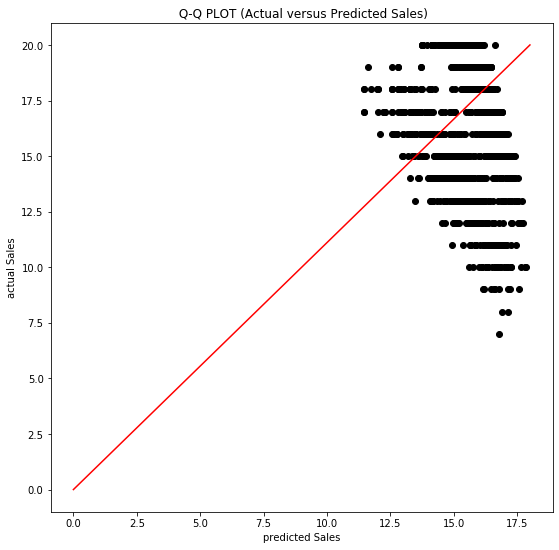

In [665]:
plt.figure(figsize=(9,9))

plt.scatter(clf_predict,y_test, c='k')
plt.xlabel('predicted Sales')
plt.ylabel('actual Sales')
plt.title(' Q-Q PLOT (Actual versus Predicted Sales)')

plt.plot( [0, 18], [0, 20], c = 'r')

print('min predict value:', np.round(clf_predict.min()))
print('max predict value:', np.round(clf_predict.max()))